In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def f(A, B):
    return np.sin(np.sqrt(A**2 + B**2))

In [3]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)

z = f(x, y)

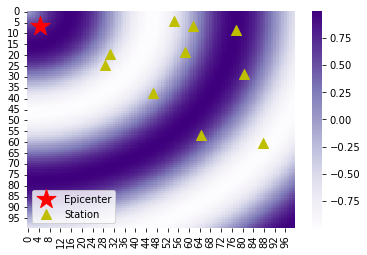

In [4]:
ax = sns.heatmap(z, cmap='Purples')
ax.scatter(5, 7, s=400, marker='*', c='r', label = 'Epicenter')
i = np.random.randint(0, 100, 10)
j = np.random.randint(0, 100, 10)
ax.scatter(i, j, s = 100, marker='^', c = 'y', label = 'Station')
ax.legend()

In [5]:
np.random.randint(0, 100, 5)

array([17, 22, 98, 21, 99])

In [6]:
n = 500
train_data = f'../ISMP/dataset/trainset_v2_{n}_label4.jb'

In [7]:
X, y = joblib.load(train_data)

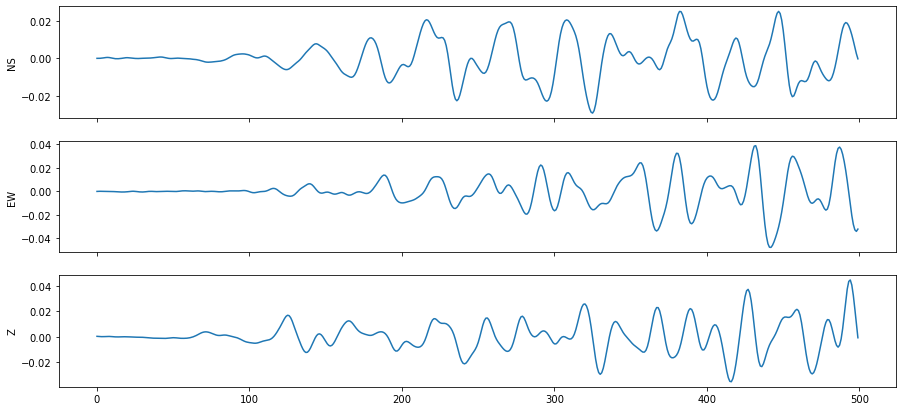

In [8]:
axis = {0:'NS', 1:'EW', 2:'Z'}
f, axs = plt.subplots(3,figsize=(15,7), sharex=True)

for i, sig in enumerate(X[0]):
    axs[i].plot(sig)
    axs[i].set_ylabel(axis[i])
plt.savefig('3-axis.png')

In [9]:
X = torch.tensor(X, dtype = torch.float)

In [10]:
cnn1d = nn.Conv1d(3, 5, kernel_size=5)
m = nn.MaxPool1d(5, stride=2)

In [11]:
x = cnn1d(X)
x = m(x)
x = F.leaky_relu(x)

In [12]:
x_cnn = x[0].detach().numpy()

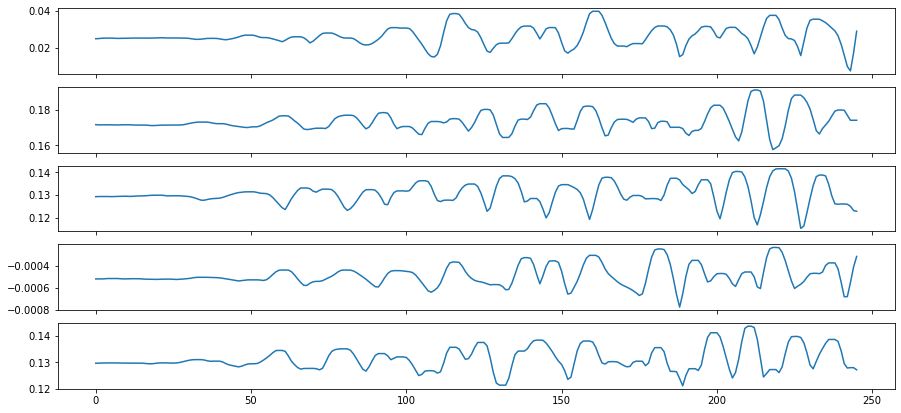

In [13]:
f, axs = plt.subplots(5,figsize=(15,7), sharex=True)

for i, sig in enumerate(x_cnn):
    axs[i].plot(sig)
plt.savefig('cnn.png')